### 1. 데이터셋 생성
- 데이터 로드
- 분할(train-test-split)

#### 데이터 로드

In [1]:
# 데이터 로드

import pandas as pd
pd.options.display.float_format = '{:.5f}'.format

# 모든 컬럼을 표시하도록 설정
pd.set_option('display.max_columns', None)

data = pd.read_csv('./04_데이터셋_최종.csv', index_col=0)

# 시계열 데이터로 변환
data.index = pd.to_datetime(data.index)

data.head()

,펀드코드,설정액(억원),기준가(원),구성비(%)_주식,구성비(%)_채권,구성비(%)_기타,일일수익률(%)_펀드,월별수익률(%)_펀드,y1,rtns_mean,rtns_std,rtns_std_month,y2,프랑스GDP,대만GDP,독일GDP,미국GDP,영국GDP,이탈리아GDP,일본GDP,캐나다GDP,한국GDP,홍콩GDP,대만PMI,독일PMI,미국PMI,영국PMI,이탈리아PMI,일본PMI,캐나다PMI,프랑스PMI,한국PMI,홍콩PMI,한국CPI,캐나다CPI,프랑스CPI,독일CPI,이탈리아CPI,일본CPI,영국CPI,미국CPI,독일PPI,미국PPI,영국PPI,이탈리아PPI,일본PPI,한국PPI,한국무역수지,캐나다무역수지,프랑스무역수지,독일무역수지,이탈리아무역수지,일본무역수지,영국무역수지,미국무역수지,한국_IPI,캐나다_IPI,프랑스_IPI,독일_IPI,이탈리아_IPI,일본_IPI,영국_IPI,미국_IPI,KOSPI_배당수익률(%),유로금리,대만금리,미국금리,영국금리,일본금리,캐나다금리,한국금리,Bond_KOR_Close,Bond_CAN_Close,Bond_TAI_Close,Bond_UK_Close,Bond_GER_Close,Bond_US_Close,Bond_ITA_Close,Bond_FRA_Close,Bond_HK_Close,Bond_JPN_Close,미국장단기금리차,한국금리스프레드,CD수익률,TIPS,신용스프레드,KRWUSD,GBPUSD,JPYUSD,EURUSD,CADUSD,TWDUSD,MSCI_KOR_Close,MSCI_CHN_Close,MSCI_CAN_Close,MSCI_TAI_Close,MSCI_UK_Close,MSCI_GER_Close,MSCI_US_Close,MSCI_ITA_Close,MSCI_FRA_Close,MSCI_HK_Close,MSCI_JPN_Close,HSCEI,HSI,KOSPI,S&P500,Nikkei225,S&P/TSX Composite Index,FTSE MIB,TAIEX,FTSE 100 index,CAC 40 index,DAX,WTI,금,아연
2016-01-31,KR5105834570,6699.00000,5082.12000,96.89000,0.00000,3.11000,2.03974,-5.12875,-0.60054,-0.25419,1.35264,6.04918,5.61522,0.30000,-0.63000,0.40000,2.00000,0.40000,0.20000,0.30000,0.60000,1.30000,0.90000,51.70000,52.10000,48.20000,51.90000,55.30000,52.40000,49.30000,50.00000,50.70000,46.40000,110.26000,108.87000,104.61000,106.14000,107.10000,103.04000,110.86000,108.65000,0.00500,-0.01000,-0.03300,-0.03300,-0.03400,-0.03900,-4938.00000,-743.00000,6066.00000,-14812.00000,292.00000,5557.00000,13510.00000,-40044.00000,100.00000,100.70000,101.40000,101.30000,102.10000,100.30000,100.40000,98.60000,1.36000,0.00050,0.01630,0.00250,0.00500,0.00081,0.00500,0.01500,2.03090,1.27013,0.99406,1.73713,0.49070,2.08323,1.54668,0.84629,1.60197,0.22510,1.18774,0.39926,1.66548,0.67090,0.54694,2.56841,-3.08497,-1.26193,0.02734,1.16998,1.93197,-3.53794,-12.59781,-1.46879,-3.16541,-2.41971,-8.76644,-5.42750,-13.22233,-4.18764,-8.91821,-7.64280,-14.69481,-10.18185,-2.51108,-5.07353,-7.96172,-1.44428,-12.89103,-3.08775,-2.53913,-5.56152,-8.79548,-9.23326,5.31082,0.06219
2016-01-31,KR5105734614,8955.00000,969.72000,0.00000,0.00000,100.00000,0.23567,0.59232,-3.37108,0.03384,0.95126,4.25418,6.71801,0.30000,-0.63000,0.40000,2.00000,0.40000,0.20000,0.30000,0.60000,1.30000,0.90000,51.70000,52.10000,48.20000,51.90000,55.30000,52.40000,49.30000,50.00000,50.70000,46.40000,110.26000,108.87000,104.61000,106.14000,107.10000,103.04000,110.86000,108.65000,0.00500,-0.01000,-0.03300,-0.03300,-0.03400,-0.03900,-4938.00000,-743.00000,6066.00000,-14812.00000,292.00000,5557.00000,13510.00000,-40044.00000,100.00000,100.70000,101.40000,101.30000,102.10000,100.30000,100.40000,98.60000,1.36000,0.00050,0.01630,0.00250,0.00500,0.00081,0.00500,0.01500,2.03090,1.27013,0.99406,1.73713,0.49070,2.08323,1.54668,0.84629,1.60197,0.22510,1.18774,0.39926,1.66548,0.67090,0.54694,2.56841,-3.08497,-1.26193,0.02734,1.16998,1.93197,-3.53794,-12.59781,-1.46879,-3.16541,-2.41971,-8.76644,-5.42750,-13.22233,-4.18764,-8.91821,-7.64280,-14.69481,-10.18185,-2.51108,-5.07353,-7.96172,-1.44428,-12.89103,-3.08775,-2.53913,-5.56152,-8.79548,-9.23326,5.31082,0.06219
2016-01-31,KR5225A04026,51.00000,6308.00000,98.14000,0.00000,1.86000,-0.04073,-3.95025,4.16899,-0.18755,1.70477,7.62397,5.86593,0.30000,-0.63000,0.40000,2.00000,0.40000,0.20000,0.30000,0.60000,1.30000,0.90000,51.70000,52.10000,48.20000,51.90000,55.30000,52.40000,49.30000,50.00000,50.70000,46.40000,110.26000,108.87000,104.61000,106.14000,107.10000,103.04000,110.86000,108.65000,0.00500,-0.01000,-0.03300,-0.03300,-0.03400,-0.03900,-4938.00000,-743.00000,6066.00000,-14812.00000,292.00000,5557.00000,13510.00000,-40044.00000,100.00000,100.70000,101.40000,101.30000,102.10000,100.30000,100.40000,98.60000,1.36000,0.00050,0.01630,0.00250,0.00500,0.00081,0.00500,0.01500,2.03090,1.27013,0.99406,1.73713,0.49070,2.08323,1.54668,0.84629,1.60197,0.22510,1.18774,0.39926,1.66548,0.67090,0.54694,2.56841,-3.08497,-1.26193,0.02734,1.16998,1.93197,-3.53794,-12.59781,-1.46

In [2]:
data.shape

(72252, 117)

In [3]:
# 결측치가 존재하는 컬럼 확인
data.columns[data.isna().sum()!=0]

Index([], dtype='object')

In [4]:
data.columns

Index(['펀드코드', '설정액(억원)', '기준가(원)', '구성비(%)_주식', '구성비(%)_채권', '구성비(%)_기타',
       '일일수익률(%)_펀드', '월별수익률(%)_펀드', 'y1', 'rtns_mean',
       ...
       'Nikkei225', 'S&P/TSX Composite Index', 'FTSE MIB', 'TAIEX',
       'FTSE 100 index', 'CAC 40 index', 'DAX', 'WTI', '금', '아연'],
      dtype='object', length=117)

In [5]:
data.loc[:, :'y2'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72252 entries, 2016-01-31 to 2023-12-31
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   펀드코드            72252 non-null  object 
 1   설정액(억원)         72252 non-null  float64
 2   기준가(원)          72252 non-null  float64
 3   구성비(%)_주식       72252 non-null  float64
 4   구성비(%)_채권       72252 non-null  float64
 5   구성비(%)_기타       72252 non-null  float64
 6   일일수익률(%)_펀드     72252 non-null  float64
 7   월별수익률(%)_펀드     72252 non-null  float64
 8   y1              72252 non-null  float64
 9   rtns_mean       72252 non-null  float64
 10  rtns_std        72252 non-null  float64
 11  rtns_std_month  72252 non-null  float64
 12  y2              72252 non-null  float64
dtypes: float64(12), object(1)
memory usage: 7.7+ MB


In [6]:
data.describe()

,설정액(억원),기준가(원),구성비(%)_주식,구성비(%)_채권,구성비(%)_기타,일일수익률(%)_펀드,월별수익률(%)_펀드,y1,rtns_mean,rtns_std,rtns_std_month,y2,프랑스GDP,대만GDP,독일GDP,미국GDP,영국GDP,이탈리아GDP,일본GDP,캐나다GDP,한국GDP,홍콩GDP,대만PMI,독일PMI,미국PMI,영국PMI,이탈리아PMI,일본PMI,캐나다PMI,프랑스PMI,한국PMI,홍콩PMI,한국CPI,캐나다CPI,프랑스CPI,독일CPI,이탈리아CPI,일본CPI,영국CPI,미국CPI,독일PPI,미국PPI,영국PPI,이탈리아PPI,일본PPI,한국PPI,한국무역수지,캐나다무역수지,프랑스무역수지,독일무역수지,이탈리아무역수지,일본무역수지,영국무역수지,미국무역수지,한국_IPI,캐나다_IPI,프랑스_IPI,독일_IPI,이탈리아_IPI,일본_IPI,영국_IPI,미국_IPI,KOSPI_배당수익률(%),유로금리,대만금리,미국금리,영국금리,일본금리,캐나다금리,한국금리,Bond_KOR_Close,Bond_CAN_Close,Bond_TAI_Close,Bond_UK_Close,Bond_GER_Close,Bond_US_Close,Bond_ITA_Close,Bond_FRA_Close,Bond_HK_Close,Bond_JPN_Close,미국장단기금리차,한국금리스프레드,CD수익률,TIPS,신용스프레드,KRWUSD,GBPUSD,JPYUSD,EURUSD,CADUSD,TWDUSD,MSCI_KOR_Close,MSCI_CHN_Close,MSCI_CAN_Close,MSCI_TAI_Close,MSCI_UK_Close,MSCI_GER_Close,MSCI_US_Close,MSCI_ITA_Close,MSCI_FRA_Close,MSCI_HK_Close,MSCI_JPN_Close,HSCEI,HSI,KOSPI,S&P500,Nikkei225,S&P/TSX Composite Index,FTSE MIB,TAIEX,FTSE 100 index,CAC 40 index,DAX,WTI,금,아연
count,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000,72252.00000
mean,662.25920,4182.23364,53.30625,0.06561,46.62814,0.05225,0.44925,0.39566,0.02056,1.12112,5.01381,5.00574,1.00129,2.51978,0.40000,2.40430,0.29064,0.26183,0.14911,0.28209,0.53662,0.15835,51.18623,51.92723,53.96993,52.13382,50.60797,50.34397,52.66105,51.09597,49.62933,48.33523,118.49529,120.70888,112.81426,116.83766,114.57447,106.25352,124.36109,122.72449,0.03142,0.03409,0.06026,0.06026,0.02648,0.02585,-2782.57965,838.26567,9630.44790,-18731.64156,-3394.58354,2431.52403,19754.56499,-57387.32413,109.56019,104.54658,99.81454,98.18563,103.40762,97.85637,102.50822,99.79236,1.80129,0.00672,0.01410,0.00250,0.01195,-0.00099,0.01603,0.01632,2.41294,1.95968,0.86181,1.61008,0.51958,2.35750,2.24989,0.91709,1.97403,0.12352,0.38680,0.33995,1.85165,0.33777,0.57961,0.14562,-0.10499,0.25739,0.01799,-0.01180,-0.01130,0.57405,0.03276,0.56001,0.96241,0.26748,0.26663,0.99016,0.50065,0.62399,-0.02643,0.58505,-0.42508,-0.19294,0.42739,0.98816,0.73075,0.56388,0.60609,0.89648,0.28245,0.63884,0.60645,1.54025,0.76131,0.61988
std,1914.40033,6619.27783,46.90742,1.08064,46.90988,1.21989,6.09427,6.11861,0.29572,0.66287,2.96443,2.95818,5.41083,2.19942,0.00000,8.53266,4.72036,3.73032,1.89062,2.98097,0.93626,2.10745,5.03772,7.64688,5.20806,5.21367,6.70243,2.98635,4.03610,4.69306,2.39773,3.99182,6.05984,8.42560,6.04771,8.15715,7.45124,2.57658,10.06926,10.25359,0.02872,0.03395,0.13467,0.13467,0.04103,0.03617,4733.30752,1997.59707,3954.84702,6541.41743,3850.99059,7243.29020,5552.64461,14450.78256,5.88667,4.08882,5.02589,5.63788,6.41291,4.93447,4.20670,3.25702,0.28930,0.01414,0.00233,0.00000,0.01592,0.00016,0.015

In [13]:
""" (1) 정보형 데이터 """
cols_info = ['펀드코드', '기준가(원)', '일일수익률(%)_펀드']

""" (2) 종속변수(y) 데이터 """
cols_y = ['y1', 'y2']

""" (3) 설명변수(X, 피처) 데이터 """
# cols_X_cate = []    # 범주형 변수
# cols_X_cont = data.drop(columns=cols_info + cols_y)    # 연속형 변수 
# cols_X_log = []     # 로그 스케일링 변수

# cols_X = cols_X_cate + cols_X_cont + cols_X_log
cols_X = data.drop(columns = cols_info+cols_y).columns

len(cols_X), len(cols_y), len(cols_info)

(112, 2, 3)

#### 데이터 분할

##### (1) X/y

In [14]:
# 데이터 분할 (1) X, y 분할

X = data[cols_X]
y = data[cols_y]

X.shape, y.shape

((72252, 112), (72252, 2))

##### (2) train/test

In [15]:
# 데이터 분할 (2) train, test 분할

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, 
#     test_size=0.2,
#     # stratify = y, # 분류모델인 경우
#     random_state=42
# )

X_train = X.loc['2016':'2021'].reset_index(drop=True)
X_test = X.loc['2022':'2023'].reset_index(drop=True)

y_train = y.loc['2016':'2021'].reset_index(drop=True)
y_test = y.loc['2022':'2023'].reset_index(drop=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((51055, 112), (21197, 112), (51055, 2), (21197, 2))

In [16]:
datas = {
    'X_train' : {
        'raw' : X_train,
        'scaled' : {},
    },
    'X_test' : {
        'raw' : X_test,
        'scaled' : {}
    },
    'y_train' : {
        'raw' : y_train,
    },
    'y_test' : {
        'raw' : y_test
    }
}

### 2. 데이터 전처리

#### 스케일링

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scalers = {
    'std' : StandardScaler(),
    'mm' : MinMaxScaler(),
    'rb' : RobustScaler()
}

def scaling_fit(method_scaler, X):
    if method_scaler == 'std':
        scaler = StandardScaler()
    elif method_scaler == 'mm':
        scaler = MinMaxScaler()
    else:
        scaler = RobustScaler()

    scaler.fit(X)
    return scaler

def scaling_transform(scaler, X):
    return pd.DataFrame(
        scaler.transform(X),
        columns=X.columns
    )

In [18]:
""" TODO - 스케일링 방법 선택 """

cols_cont = cols_X

# 스케일링 : std, mm, ru
for method in scalers.keys():
    X_train_raw = datas['X_train']['raw']

    # fit
    scaler = scaling_fit(method, X_train_raw[cols_cont])

    # X_train_scaled
    X_train_scaled = X_train_raw.copy()
    datas['X_train']['scaled'][method] = pd.DataFrame(
        scaler.transform(X_train_scaled),
        columns=X_train_scaled.columns
    )

    # X_test_scaled
    X_test_scaled = datas['X_test']['raw'].copy()
    datas['X_test']['scaled'][method] = pd.DataFrame(
        scaler.transform(X_test_scaled),
        columns=X_test_scaled.columns
    )    

In [19]:
datas['X_train']['raw'].describe()

,설정액(억원),구성비(%)_주식,구성비(%)_채권,구성비(%)_기타,월별수익률(%)_펀드,rtns_mean,rtns_std,rtns_std_month,프랑스GDP,대만GDP,독일GDP,미국GDP,영국GDP,이탈리아GDP,일본GDP,캐나다GDP,한국GDP,홍콩GDP,대만PMI,독일PMI,미국PMI,영국PMI,이탈리아PMI,일본PMI,캐나다PMI,프랑스PMI,한국PMI,홍콩PMI,한국CPI,캐나다CPI,프랑스CPI,독일CPI,이탈리아CPI,일본CPI,영국CPI,미국CPI,독일PPI,미국PPI,영국PPI,이탈리아PPI,일본PPI,한국PPI,한국무역수지,캐나다무역수지,프랑스무역수지,독일무역수지,이탈리아무역수지,일본무역수지,영국무역수지,미국무역수지,한국_IPI,캐나다_IPI,프랑스_IPI,독일_IPI,이탈리아_IPI,일본_IPI,영국_IPI,미국_IPI,KOSPI_배당수익률(%),유로금리,대만금리,미국금리,영국금리,일본금리,캐나다금리,한국금리,Bond_KOR_Close,Bond_CAN_Close,Bond_TAI_Close,Bond_UK_Close,Bond_GER_Close,Bond_US_Close,Bond_ITA_Close,Bond_FRA_Close,Bond_HK_Close,Bond_JPN_Close,미국장단기금리차,한국금리스프레드,CD수익률,TIPS,신용스프레드,KRWUSD,GBPUSD,JPYUSD,EURUSD,CADUSD,TWDUSD,MSCI_KOR_Close,MSCI_CHN_Close,MSCI_CAN_Close,MSCI_TAI_Close,MSCI_UK_Close,MSCI_GER_Close,MSCI_US_Close,MSCI_ITA_Close,MSCI_FRA_Close,MSCI_HK_Close,MSCI_JPN_Close,HSCEI,HSI,KOSPI,S&P500,Nikkei225,S&P/TSX Composite Index,FTSE MIB,TAIEX,FTSE 100 index,CAC 40 index,DAX,WTI,금,아연
count,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000
mean,705.11517,52.53713,0.07070,47.39216,0.72977,0.03580,1.08726,4.86238,1.26766,2.75874,0.40000,2.48016,0.27739,0.18810,0.06493,0.14052,0.56936,0.23312,52.82053,53.94773,55.35362,53.58872,50.31913,50.33614,53.29380,52.20017,49.62852,47.59665,114.94720,115.82171,109.30993,112.06491,110.11011,104.83303,118.54007,116.76266,0.01571,0.02354,0.01646,0.01646,0.00849,0.01501,-4909.77998,1412.89740,7783.21444,-20906.26509,-4731.09594,-289.07024,18284.94674,-51408.22294,107.34360,103.32492,100.41522,99.59203,103.09384,98.94354,103.63080,98.91024,1.72023,0.00001,0.01310,0.00250,0.00391,-0.00098,0.00859,0.01153,1.95948,1.49426,0.72317,0.93667,-0.03018,1.89411,1.63923,0.31335,1.43508,0.00960,0.68869,0.43178,1.32711,0.03176,0.45400,0.06431,-0.07206,-0.00937,0.04467,-0.08402,-0.19603,0.86024,0.56685,0.74500,1.32968,0.24824,0.41058,1.32675,0.43356,0.76216,0.33776,0.50764,-0.15640,0.13349,0.69426,1.31006,0.72017,0.77332,0.59083,1.20499,0.29644,0.74965,0.69232,2.15256,0.80843,1.21024
std,2058.58288,46.95083,1.22729,46.94511,5.85395,0.27782,0.70435,3.14993,6.40612,2.06975,0.00000,10.02949,5.60739,4.40841,2.20018,3.51983,1.07789,1.96778,4.43012,7.30659,4.93561,4.85830,7.76712,3.30817,4.13276,4.38797,2.61368,4.16609,2.46028,3.85687,2.30054,2.94916,1.69695,0.81938,3.96964,4.77589,0.01201,0.02451,0.05413,0.05413,0.02967,0.02994,2972.11958,1595.71161,2346.88840,4992.96127,2660.04478,5281.66650,5026.77977,11436.00057,4.92560,4.28454,5.83988,6.03846,7.51421,5.42909,4.51805,3.50031,0.30018,0.00008,0.00134,0.00000,0.00261,0.00019,0.00606,0.00428,0.39745,0.52163,0.26737,0.42238,0.38247,0.70602,0.75622,0.41395,0.49818,0.08423,0.40457,0.20365,0.39357,0.67738,0.09787,2.23002,2.5

In [20]:
datas['X_train']['scaled']['std'].describe()

,설정액(억원),구성비(%)_주식,구성비(%)_채권,구성비(%)_기타,월별수익률(%)_펀드,rtns_mean,rtns_std,rtns_std_month,프랑스GDP,대만GDP,독일GDP,미국GDP,영국GDP,이탈리아GDP,일본GDP,캐나다GDP,한국GDP,홍콩GDP,대만PMI,독일PMI,미국PMI,영국PMI,이탈리아PMI,일본PMI,캐나다PMI,프랑스PMI,한국PMI,홍콩PMI,한국CPI,캐나다CPI,프랑스CPI,독일CPI,이탈리아CPI,일본CPI,영국CPI,미국CPI,독일PPI,미국PPI,영국PPI,이탈리아PPI,일본PPI,한국PPI,한국무역수지,캐나다무역수지,프랑스무역수지,독일무역수지,이탈리아무역수지,일본무역수지,영국무역수지,미국무역수지,한국_IPI,캐나다_IPI,프랑스_IPI,독일_IPI,이탈리아_IPI,일본_IPI,영국_IPI,미국_IPI,KOSPI_배당수익률(%),유로금리,대만금리,미국금리,영국금리,일본금리,캐나다금리,한국금리,Bond_KOR_Close,Bond_CAN_Close,Bond_TAI_Close,Bond_UK_Close,Bond_GER_Close,Bond_US_Close,Bond_ITA_Close,Bond_FRA_Close,Bond_HK_Close,Bond_JPN_Close,미국장단기금리차,한국금리스프레드,CD수익률,TIPS,신용스프레드,KRWUSD,GBPUSD,JPYUSD,EURUSD,CADUSD,TWDUSD,MSCI_KOR_Close,MSCI_CHN_Close,MSCI_CAN_Close,MSCI_TAI_Close,MSCI_UK_Close,MSCI_GER_Close,MSCI_US_Close,MSCI_ITA_Close,MSCI_FRA_Close,MSCI_HK_Close,MSCI_JPN_Close,HSCEI,HSI,KOSPI,S&P500,Nikkei225,S&P/TSX Composite Index,FTSE MIB,TAIEX,FTSE 100 index,CAC 40 index,DAX,WTI,금,아연
count,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000
mean,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000
std,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,0.00000,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,0.00000,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001

In [21]:
datas['X_test']['scaled']['std'].describe()

,설정액(억원),구성비(%)_주식,구성비(%)_채권,구성비(%)_기타,월별수익률(%)_펀드,rtns_mean,rtns_std,rtns_std_month,프랑스GDP,대만GDP,독일GDP,미국GDP,영국GDP,이탈리아GDP,일본GDP,캐나다GDP,한국GDP,홍콩GDP,대만PMI,독일PMI,미국PMI,영국PMI,이탈리아PMI,일본PMI,캐나다PMI,프랑스PMI,한국PMI,홍콩PMI,한국CPI,캐나다CPI,프랑스CPI,독일CPI,이탈리아CPI,일본CPI,영국CPI,미국CPI,독일PPI,미국PPI,영국PPI,이탈리아PPI,일본PPI,한국PPI,한국무역수지,캐나다무역수지,프랑스무역수지,독일무역수지,이탈리아무역수지,일본무역수지,영국무역수지,미국무역수지,한국_IPI,캐나다_IPI,프랑스_IPI,독일_IPI,이탈리아_IPI,일본_IPI,영국_IPI,미국_IPI,KOSPI_배당수익률(%),유로금리,대만금리,미국금리,영국금리,일본금리,캐나다금리,한국금리,Bond_KOR_Close,Bond_CAN_Close,Bond_TAI_Close,Bond_UK_Close,Bond_GER_Close,Bond_US_Close,Bond_ITA_Close,Bond_FRA_Close,Bond_HK_Close,Bond_JPN_Close,미국장단기금리차,한국금리스프레드,CD수익률,TIPS,신용스프레드,KRWUSD,GBPUSD,JPYUSD,EURUSD,CADUSD,TWDUSD,MSCI_KOR_Close,MSCI_CHN_Close,MSCI_CAN_Close,MSCI_TAI_Close,MSCI_UK_Close,MSCI_GER_Close,MSCI_US_Close,MSCI_ITA_Close,MSCI_FRA_Close,MSCI_HK_Close,MSCI_JPN_Close,HSCEI,HSI,KOSPI,S&P500,Nikkei225,S&P/TSX Composite Index,FTSE MIB,TAIEX,FTSE 100 index,CAC 40 index,DAX,WTI,금,아연
count,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000,21197.00000
mean,-0.07096,0.05584,-0.01416,-0.05547,-0.16334,-0.18696,0.16387,0.16387,-0.14173,-0.39354,-0.00000,-0.02578,0.00805,0.05701,0.13041,0.13710,-0.10353,-0.12951,-1.25747,-0.94259,-0.95560,-1.02077,0.12676,0.00807,-0.52188,-0.85775,0.00105,0.60430,4.91574,4.31919,5.19225,5.51632,8.96745,5.90921,4.99836,4.25505,4.45973,1.46676,2.75798,2.75798,2.06780,1.23424,2.43962,-1.22748,2.68293,1.48459,1.71263,1.75579,0.99654,-1.78214,1.53393,0.97191,-0.35061,-0.79390,0.14234,-0.68257,-0.84693,0.85902,0.92044,296.88537,2.53173,0.00000,10.49427,-0.10877,4.17811,3.81635,3.88898,3.04131,1.76744,5.43436,4.89961,2.23721,2.75252,4.97145,3.68760,4.61041,-2.54350,-1.53699,4.54298,1.53985,4.37483,0.12429,-0.04462,0.46145,-0.04980,0.11962,0.55887,-0.20589,-0.32490,-0.16786,-0.28119,0.01739,-0.10076,-0.26409,0.03680,-0.09942,-0.24978,0.06051,-0.17133,-0.22951,-0.19637,-0.25496,0.00740,-0.18162,0.00842,-0.26419,-0.01250,-0.07754,-0.05849,-0.13253,-0.04165,-0.34062
std,0.73194,0.99577,0.48371,0.99638,1.12554,1.19528,0.76904,0.76904,0.09455,1.15375,0.00000,0.24093,0.08283,0.17254,0.31038,0.15151,0.39436,1.22037,0.93907,0.83495,0.86110,0.88356,0.34386,0.60752,0.80624,0.98521,0.67826,0.68029,1.09326,0.82229,1.44820,1.47177,2.54719,2.57336,1.36713,0.71362,1.74151,1.61567,3.64845,3.64845,1.04386,1.22029,1.42515,1.36696,1.47805,1.37287,1.63187,1.35050,1.02411,0.88874,0.89294,0.16803,0.17079,0.34267,0.24450,0.27931,0.19891,0.14567,0.39844,229.59994,1.82493,0.00000,6.84288,0.00000,2.79548,2.06329,1.07515,1.03595,0.84269,2.51303,2.16609,1.07513,1.21218,2.07402,1.40288,2.40458,1.09579,0.69866,2.31298,1.29914,2.75640,1.61429,1.05840,1.81926,1.33606,0.84459,1.69963,1.37905,1.68141,1.1549

### (*) 피처 셀렉션

In [22]:
X_TRAIN = datas['X_train']['scaled']['mm']
X_TEST = datas['X_test']['scaled']['mm']

y1_TRAIN = datas['y_train']['raw']['y1']
y1_TEST = datas['y_test']['raw']['y1']

y2_TRAIN = datas['y_train']['raw']['y2']
y2_TEST = datas['y_test']['raw']['y2']

Text(0, 0.5, 'count')

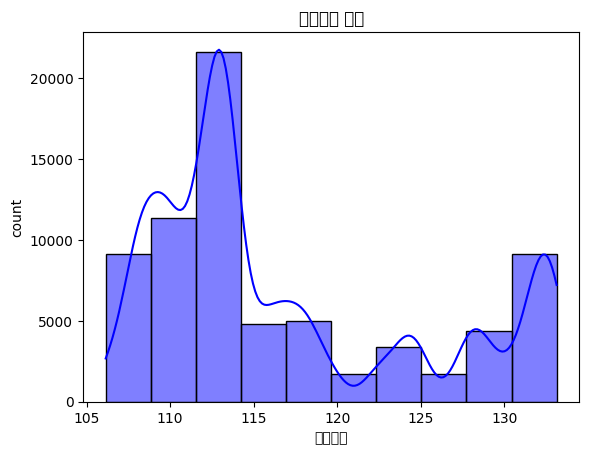

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히스토그램과 KDE 플롯
sns.histplot(data["독일CPI"], kde=True, bins=10, color='blue')

# 그래프 제목과 라벨 설정
plt.title('신용점수 분포')
plt.xlabel('신용점수')
plt.ylabel('count')


In [86]:
X_TRAIN.describe()

,설정액(억원),구성비(%)_주식,구성비(%)_채권,구성비(%)_기타,월별수익률(%)_펀드,rtns_mean,rtns_std,rtns_std_month,프랑스GDP,대만GDP,독일GDP,미국GDP,영국GDP,이탈리아GDP,일본GDP,캐나다GDP,한국GDP,홍콩GDP,대만PMI,독일PMI,미국PMI,영국PMI,이탈리아PMI,일본PMI,캐나다PMI,프랑스PMI,한국PMI,홍콩PMI,한국CPI,캐나다CPI,프랑스CPI,독일CPI,이탈리아CPI,일본CPI,영국CPI,미국CPI,독일PPI,미국PPI,영국PPI,이탈리아PPI,일본PPI,한국PPI,한국무역수지,캐나다무역수지,프랑스무역수지,독일무역수지,이탈리아무역수지,일본무역수지,영국무역수지,미국무역수지,한국_IPI,캐나다_IPI,프랑스_IPI,독일_IPI,이탈리아_IPI,일본_IPI,영국_IPI,미국_IPI,KOSPI_배당수익률(%),유로금리,대만금리,미국금리,영국금리,일본금리,캐나다금리,한국금리,Bond_KOR_Close,Bond_CAN_Close,Bond_TAI_Close,Bond_UK_Close,Bond_GER_Close,Bond_US_Close,Bond_ITA_Close,Bond_FRA_Close,Bond_HK_Close,Bond_JPN_Close,미국장단기금리차,한국금리스프레드,CD수익률,TIPS,신용스프레드,KRWUSD,GBPUSD,JPYUSD,EURUSD,CADUSD,TWDUSD,MSCI_KOR_Close,MSCI_CHN_Close,MSCI_CAN_Close,MSCI_TAI_Close,MSCI_UK_Close,MSCI_GER_Close,MSCI_US_Close,MSCI_ITA_Close,MSCI_FRA_Close,MSCI_HK_Close,MSCI_JPN_Close,HSCEI,HSI,KOSPI,S&P500,Nikkei225,S&P/TSX Composite Index,FTSE MIB,TAIEX,FTSE 100 index,CAC 40 index,DAX,WTI,금,아연
count,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000,51055.00000
mean,0.01673,0.41313,0.00111,0.58632,0.58111,0.59368,0.06764,0.06764,0.46362,0.35820,0.00000,0.52284,0.56082,0.45255,0.60340,0.57061,0.71120,0.52199,0.53271,0.60707,0.59714,0.62315,0.83727,0.75519,0.76870,0.74461,0.59489,0.71766,0.45998,0.46531,0.50755,0.48605,0.41604,0.60781,0.46773,0.42231,0.34017,0.32908,0.25352,0.25352,0.38247,0.40006,0.56420,0.52648,0.42389,0.38401,0.49282,0.42382,0.44589,0.66795,0.41322,0.75823,0.83156,0.78129,0.84618,0.73449,0.60853,0.77658,0.35791,0.02684,0.35977,0.00000,0.44842,0.01169,0.40612,0.52209,0.46523,0.49120,0.49173,0.49439,0.44102,0.50146,0.37128,0.47786,0.48119,0.53884,0.44802,0.37586,0.54668,0.50486,0.33903,0.59320,0.54426,0.48975,0.40821,0.40732,0.49425,0.47701,0.55945,0.64751,0.54214,0.52989,0.55915,0.54786,0.49893,0.49444,0.56275,0.47283,0.47645,0.51314,0.50838,0.52667,0.43988,0.58650,0.50738,0.60958,0.53915,0.48111,0.54471,0.39544,0.47321,0.51949
std,0.04885,0.36920,0.01932,0.36915,0.05478,0.05731,0.05224,0.05224,0.19711,0.21560,0.00000,0.15478,0.15663,0.15360,0.16668,0.17254,0.20338,0.18564,0.21610,0.22691,0.21274,0.14633,0.16456,0.19929,0.15654,0.15784,0.18669,0.20624,0.24144,0.25816,0.24844,0.24193,0.21924,0.27776,0.24176,0.24862,0.21837,0.22694,0.19757,0.19757,0.22475,0.22178,0.19706,0.21514,0.20199,0.18193,0.21086,0.22782,0.20963,0.25996,0.18945,0.17632,0.15169,0.16914,0.14258,0.20722,0.18292,0.18231,0.24405,0.15394,0.26873,0.00000,0.40130,0.10750,0.40431,0.34251,0.26292,0.26417,0.29141,0.26680,0.28441,0.27806,0.25668,0.30314,0.25438,0.18024,0.28395,0.22425,0.30864,0.31015,0.21169,0.16144,0.17295,0.13283,0.19607,0.20314,0.21658,0.17574,0.21389,0.13691,0.15936,0.14186,0.15699,0.16796,0.13547,0.12645,0.2

In [167]:
y1_TRAIN

0        -0.60054
1        -3.37108
2         4.16899
3        -3.15483
4         3.48208
           ...   
51050   -10.40913
51051    -9.89933
51052   -10.41804
51053   -11.17079
51054    -6.83822
Name: y1, Length: 51055, dtype: float64

In [65]:
import statsmodels.api as sm

feature_add = sm.add_constant(
    X_TRAIN.drop(columns = ['독일CPI','독일_IPI','이탈리아GDP','미국PPI']), 
    has_constant='add'
)

# sm OLS 적합
model = sm.OLS(y1_TRAIN, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     1924.
Date:                Tue, 30 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:56:40   Log-Likelihood:            -1.2960e+05
No. Observations:               51055   AIC:                         2.594e+05
Df Residuals:                   50976   BIC:                         2.601e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     792.7697   1835.030      0.432      0.666   -2803.909    4389.449
설정액(억원)                     0.2873      0.281      1.021      0.307      -0.264       0.839
구성비(%)_주식               -1698.6714   4004.691     -0.424      0.671   -9547.908    6150.565
구성비(%)_채권                -846.4752   2000.621     -0.423      0.672   -4767.714    3074.764
구성비(%)_기타               -1698.6135   4004.691     -0.424      0.671   -9547.850    6150.623
월별수익률(%)_펀드               -23.1551      4.597     -5.037      0.000     -32.165     -14.146
rtns_mean                  24.7574      4.357      5.682      0.000      16.218      33.297
rtns_std                    2.6924      0.210     12.850      0.000       2.282       3.103
rtns_std_month              2.6924      0.210     12.850      0.000       2.282       3.103
프랑스GDP                    -57.0623    175.495     -0.325      0.745    -401.035     286.910
대만GDP                     101.6165    224.753      0.452      0.651    -338.902     542.134
독일GDP                    4.693e-09    1.1e-08      0.425      0.671   -1.69e-08    2.63e-08
미국GDP                     -40.9082     31.622     -1.294      0.196    -102.887      21.071
영국GDP                     -21.6544     81.636     -0.265      0.791    -181.662     138.354
일본GDP                      66.9797    157.674      0.425      0.671    -242.063     376.023
캐나다GDP                     62.1141    118.517      0.524      0.600    -170.181     294.409
한국GDP                      95.9210    223.995      0.428      0.668    -343.112     534.954
홍콩GDP                     -47.9036     50.297     -0.952      0.341    -146.486      50.679
대만PMI                      -9.6269     52.903     -0.182      0.856    -113.317      94.064
독일PMI                     277.7871    651.473      0.426      0.670    -999.106    1554.680
미국PMI                      81.9094    238.546      0.343      0.731    -385.644     549.463
영국PMI                     -44.8893    166.105     -0.270      0.787    -370.457     280.679
이탈리아PMI                    28.9960     50.766      0.571      0.568     -70.505     128.497
일본PMI                     163.3763    320.481      0.510      0.610    -464.771     791.523
캐나다PMI                    -61.3275    170.419     -0.360      0.719    -395.351     272.696
프랑스PMI                    -59.5725    140.963     -0.423      0.673    -335.861     216.716
한국PMI                       8.4697     27.740      0.305      0.760     -45.901      62.840
홍콩PMI                     -81.7707    185.531     -0.441      0.659    -445.413     281.872
한국CPI                     -16.5327     41.781     -0.396      0.692     -98.424      65.359
캐나다CPI                    190.5719    409.731      0.465      0.642    -612.506     993.649
프랑스CPI                     69.2038    152.739  

In [66]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 
                    
    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(feature_add).values

array([[inf, 'KOSPI_배당수익률(%)'],
       [inf, 'CADUSD'],
       [inf, 'JPYUSD'],
       [inf, 'GBPUSD'],
       [inf, 'KRWUSD'],
       [inf, '신용스프레드'],
       [inf, 'TIPS'],
       [inf, 'CD수익률'],
       [inf, '한국금리스프레드'],
       [inf, '미국장단기금리차'],
       [inf, 'Bond_JPN_Close'],
       [inf, 'Bond_HK_Close'],
       [inf, 'Bond_FRA_Close'],
       [inf, 'Bond_ITA_Close'],
       [inf, 'Bond_US_Close'],
       [inf, 'Bond_GER_Close'],
       [inf, 'Bond_UK_Close'],
       [inf, 'Bond_TAI_Close'],
       [inf, 'Bond_CAN_Close'],
       [inf, 'Bond_KOR_Close'],
       [inf, '한국금리'],
       [inf, '캐나다금리'],
       [inf, '일본금리'],
       [inf, '영국금리'],
       [inf, '미국금리'],
       [inf, 'EURUSD'],
       [inf, 'TWDUSD'],
       [inf, '유로금리'],
       [inf, 'MSCI_KOR_Close'],
       [inf, '금'],
       [inf, 'WTI'],
       [inf, 'DAX'],
       [inf, 'CAC 40 index'],
       [inf, 'FTSE 100 index'],
       [inf, 'TAIEX'],
       [inf, 'FTSE MIB'],
       [inf, 'S&P/TSX Composite Index'],
       [

In [71]:
# 후진 제거법 함수 정의
def backward_elimination(X, y, significance_level=0.05):
    initial_features = list(X.columns)
    while True:
        model = sm.OLS(y, X[initial_features]).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            initial_features.remove(excluded_feature)
            print(f'Removed: {excluded_feature} (p-value: {max_p_value})')
        else:
            break
    return initial_features

# 후진 제거법 적용
selected_features = backward_elimination(feature_add, y1_TRAIN)
print('Selected Features:', selected_features)

Removed: HSI (p-value: 0.9020551372940521)
Removed: 유로금리 (p-value: 0.9005931025452691)
Removed: 한국금리 (p-value: 0.872444131882399)
Removed: 미국장단기금리차 (p-value: 0.8591771522701577)
Removed: GBPUSD (p-value: 0.9673672637098225)
Removed: HSCEI (p-value: 0.9268150709814548)
Removed: TIPS (p-value: 0.9197386059603263)
Removed: DAX (p-value: 0.9197007690492096)
Removed: 한국PMI (p-value: 0.9000065547818653)
Removed: S&P/TSX Composite Index (p-value: 0.9127372717967626)
Removed: 이탈리아_IPI (p-value: 0.8825059125435242)
Removed: Bond_FRA_Close (p-value: 0.9941435958186529)
Removed: 미국_IPI (p-value: 0.9702196413657991)
Removed: 한국CPI (p-value: 0.9519635117352628)
Removed: MSCI_UK_Close (p-value: 0.9217140755715519)
Removed: 대만PMI (p-value: 0.9103953055670189)
Removed: 프랑스_IPI (p-value: 0.8882479427769898)
Removed: 미국GDP (p-value: 0.9587392938344437)
Removed: MSCI_HK_Close (p-value: 0.9643612493273404)
Removed: 일본PPI (p-value: 0.9423882078577485)
Removed: 일본CPI (p-value: 0.9642975148850679)
Removed: B

In [74]:
Features =  ['구성비(%)_주식', '구성비(%)_채권', '구성비(%)_기타', '월별수익률(%)_펀드', 'rtns_mean', 'rtns_std', 'rtns_std_month', '프랑스GDP', '대만GDP', '독일GDP', '영국GDP', '일본GDP', '캐나다GDP', '한국GDP', '홍콩GDP', '독일PMI', '미국PMI', '영국PMI', '이탈리아PMI', '일본PMI', '캐나다PMI', '프랑스PMI', '홍콩PMI', '캐나다CPI', '이탈리아CPI', '영국CPI', '독일PPI', '영국PPI', '이탈리아PPI', '한국PPI', '캐나다무역수지', '독일무역수지', '이탈리아무역수지', '일본무역수지', '영국무역수지', '미국무역수지', '한국_IPI', '캐나다_IPI', '일본_IPI', '영국_IPI', 'KOSPI_배당수익률(%)', '대만금리', '미국금리', '영국금리', '일본금리', '캐나다금리', 'Bond_KOR_Close', 'Bond_CAN_Close', 'Bond_TAI_Close', 'Bond_UK_Close', 'Bond_GER_Close', 'Bond_ITA_Close', 'Bond_HK_Close', 'Bond_JPN_Close', '한국금리스프레드', 'CD수익률', '신용스프레드', 'KRWUSD', 'JPYUSD', 'EURUSD', 'CADUSD', 'TWDUSD', 'MSCI_KOR_Close', 'MSCI_CHN_Close', 'MSCI_CAN_Close', 'MSCI_TAI_Close', 'MSCI_GER_Close', 'MSCI_US_Close', 'MSCI_ITA_Close', 'MSCI_JPN_Close', 'KOSPI', 'Nikkei225', 'FTSE MIB', 'TAIEX', 'FTSE 100 index', 'CAC 40 index', 'WTI', '금', '아연']
vif(feature_add[Features]).values

array([[inf, '이탈리아PPI'],
       [inf, '영국PPI'],
       [inf, 'rtns_std'],
       [inf, 'rtns_std_month'],
       [458222.98978590936, '구성비(%)_기타'],
       [293038.20058037, '구성비(%)_주식'],
       [60067.41484284328, '독일PMI'],
       [56788.71260682073, '미국금리'],
       [38063.20477242627, '월별수익률(%)_펀드'],
       [35730.061577136934, 'rtns_mean'],
       [31799.02731126249, 'CD수익률'],
       [27320.671529280804, 'Bond_HK_Close'],
       [25156.438372789555, '캐나다CPI'],
       [20048.722887663025, '캐나다_IPI'],
       [18760.298496784566, '캐나다PMI'],
       [16013.79027481026, '영국CPI'],
       [13084.666349494866, '영국_IPI'],
       [12153.192991551656, '캐나다금리'],
       [12009.021243694817, 'Bond_KOR_Close'],
       [11151.514164376023, '프랑스PMI'],
       [10826.721509479341, '일본PMI'],
       [9970.093436630968, 'FTSE MIB'],
       [9742.765921423928, '이탈리아CPI'],
       [9715.792089293396, 'Bond_JPN_Close'],
       [8143.241618385811, 'Nikkei225'],
       [8086.223340631492, '일본GDP'],
       [7489.

In [77]:
# 후진 제거법 적용
selected_features = backward_elimination(feature_add[Features], y1_TRAIN)
print('Selected Features:', selected_features)

Selected Features: ['구성비(%)_주식', '구성비(%)_채권', '구성비(%)_기타', '월별수익률(%)_펀드', 'rtns_mean', 'rtns_std', 'rtns_std_month', '프랑스GDP', '대만GDP', '독일GDP', '영국GDP', '일본GDP', '캐나다GDP', '한국GDP', '홍콩GDP', '독일PMI', '미국PMI', '영국PMI', '이탈리아PMI', '일본PMI', '캐나다PMI', '프랑스PMI', '홍콩PMI', '캐나다CPI', '이탈리아CPI', '영국CPI', '독일PPI', '영국PPI', '이탈리아PPI', '한국PPI', '캐나다무역수지', '독일무역수지', '이탈리아무역수지', '일본무역수지', '영국무역수지', '미국무역수지', '한국_IPI', '캐나다_IPI', '일본_IPI', '영국_IPI', 'KOSPI_배당수익률(%)', '대만금리', '미국금리', '영국금리', '일본금리', '캐나다금리', 'Bond_KOR_Close', 'Bond_CAN_Close', 'Bond_TAI_Close', 'Bond_UK_Close', 'Bond_GER_Close', 'Bond_ITA_Close', 'Bond_HK_Close', 'Bond_JPN_Close', '한국금리스프레드', 'CD수익률', '신용스프레드', 'KRWUSD', 'JPYUSD', 'EURUSD', 'CADUSD', 'TWDUSD', 'MSCI_KOR_Close', 'MSCI_CHN_Close', 'MSCI_CAN_Close', 'MSCI_TAI_Close', 'MSCI_GER_Close', 'MSCI_US_Close', 'MSCI_ITA_Close', 'MSCI_JPN_Close', 'KOSPI', 'Nikkei225', 'FTSE MIB', 'TAIEX', 'FTSE 100 index', 'CAC 40 index', 'WTI', '금', '아연']


In [81]:
a =  ['구성비(%)_주식', '구성비(%)_채권', '구성비(%)_기타', '월별수익률(%)_펀드', 'rtns_mean', 'rtns_std', 'rtns_std_month', '프랑스GDP', '대만GDP', '독일GDP', '영국GDP', '일본GDP', '캐나다GDP', '한국GDP', '홍콩GDP', '독일PMI', '미국PMI', '영국PMI', '이탈리아PMI', '일본PMI', '캐나다PMI', '프랑스PMI', '홍콩PMI', '캐나다CPI', '이탈리아CPI', '영국CPI', '독일PPI', '영국PPI', '이탈리아PPI', '한국PPI', '캐나다무역수지', '독일무역수지', '이탈리아무역수지', '일본무역수지', '영국무역수지', '미국무역수지', '한국_IPI', '캐나다_IPI', '일본_IPI', '영국_IPI', 'KOSPI_배당수익률(%)', '대만금리', '미국금리', '영국금리', '일본금리', '캐나다금리', 'Bond_KOR_Close', 'Bond_CAN_Close', 'Bond_TAI_Close', 'Bond_UK_Close', 'Bond_GER_Close', 'Bond_ITA_Close', 'Bond_HK_Close', 'Bond_JPN_Close', '한국금리스프레드', 'CD수익률', '신용스프레드', 'KRWUSD', 'JPYUSD', 'EURUSD', 'CADUSD', 'TWDUSD', 'MSCI_KOR_Close', 'MSCI_CHN_Close', 'MSCI_CAN_Close', 'MSCI_TAI_Close', 'MSCI_GER_Close', 'MSCI_US_Close', 'MSCI_ITA_Close', 'MSCI_JPN_Close', 'KOSPI', 'Nikkei225', 'FTSE MIB', 'TAIEX', 'FTSE 100 index', 'CAC 40 index', 'WTI', '금', '아연']
len(a)

79

In [80]:
# 후진 제거법 함수 정의 (p-값 기준)
def backward_elimination_pvalue(X, y, significance_level=0.05):
    initial_features = list(X.columns)
    while True:
        model = sm.OLS(y, X[initial_features]).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            initial_features.remove(excluded_feature)
            print(f'Removed: {excluded_feature} (p-value: {max_p_value})')
        else:
            break
    return initial_features

# 후진 제거법 적용 (p-값 기준)
selected_features = backward_elimination_pvalue(feature_add[a], y1_TRAIN)
print('Selected Features:', selected_features)

Selected Features: ['구성비(%)_주식', '구성비(%)_채권', '구성비(%)_기타', '월별수익률(%)_펀드', 'rtns_mean', 'rtns_std', 'rtns_std_month', '프랑스GDP', '대만GDP', '독일GDP', '영국GDP', '일본GDP', '캐나다GDP', '한국GDP', '홍콩GDP', '독일PMI', '미국PMI', '영국PMI', '이탈리아PMI', '일본PMI', '캐나다PMI', '프랑스PMI', '홍콩PMI', '캐나다CPI', '이탈리아CPI', '영국CPI', '독일PPI', '영국PPI', '이탈리아PPI', '한국PPI', '캐나다무역수지', '독일무역수지', '이탈리아무역수지', '일본무역수지', '영국무역수지', '미국무역수지', '한국_IPI', '캐나다_IPI', '일본_IPI', '영국_IPI', 'KOSPI_배당수익률(%)', '대만금리', '미국금리', '영국금리', '일본금리', '캐나다금리', 'Bond_KOR_Close', 'Bond_CAN_Close', 'Bond_TAI_Close', 'Bond_UK_Close', 'Bond_GER_Close', 'Bond_ITA_Close', 'Bond_HK_Close', 'Bond_JPN_Close', '한국금리스프레드', 'CD수익률', '신용스프레드', 'KRWUSD', 'JPYUSD', 'EURUSD', 'CADUSD', 'TWDUSD', 'MSCI_KOR_Close', 'MSCI_CHN_Close', 'MSCI_CAN_Close', 'MSCI_TAI_Close', 'MSCI_GER_Close', 'MSCI_US_Close', 'MSCI_ITA_Close', 'MSCI_JPN_Close', 'KOSPI', 'Nikkei225', 'FTSE MIB', 'TAIEX', 'FTSE 100 index', 'CAC 40 index', 'WTI', '금', '아연']


In [90]:
selected_features

['구성비(%)_주식',
 '구성비(%)_채권',
 '구성비(%)_기타',
 '월별수익률(%)_펀드',
 'rtns_mean',
 'rtns_std',
 'rtns_std_month',
 '프랑스GDP',
 '대만GDP',
 '독일GDP',
 '영국GDP',
 '일본GDP',
 '캐나다GDP',
 '한국GDP',
 '홍콩GDP',
 '독일PMI',
 '미국PMI',
 '영국PMI',
 '이탈리아PMI',
 '일본PMI',
 '캐나다PMI',
 '프랑스PMI',
 '홍콩PMI',
 '캐나다CPI',
 '이탈리아CPI',
 '영국CPI',
 '독일PPI',
 '영국PPI',
 '이탈리아PPI',
 '한국PPI',
 '캐나다무역수지',
 '독일무역수지',
 '이탈리아무역수지',
 '일본무역수지',
 '영국무역수지',
 '미국무역수지',
 '한국_IPI',
 '캐나다_IPI',
 '일본_IPI',
 '영국_IPI',
 'KOSPI_배당수익률(%)',
 '대만금리',
 '미국금리',
 '영국금리',
 '일본금리',
 '캐나다금리',
 'Bond_KOR_Close',
 'Bond_CAN_Close',
 'Bond_TAI_Close',
 'Bond_UK_Close',
 'Bond_GER_Close',
 'Bond_ITA_Close',
 'Bond_HK_Close',
 'Bond_JPN_Close',
 '한국금리스프레드',
 'CD수익률',
 '신용스프레드',
 'KRWUSD',
 'JPYUSD',
 'EURUSD',
 'CADUSD',
 'TWDUSD',
 'MSCI_KOR_Close',
 'MSCI_CHN_Close',
 'MSCI_CAN_Close',
 'MSCI_TAI_Close',
 'MSCI_GER_Close',
 'MSCI_US_Close',
 'MSCI_ITA_Close',
 'MSCI_JPN_Close',
 'KOSPI',
 'Nikkei225',
 'FTSE MIB',
 'TAIEX',
 'FTSE 100 index',
 'CAC 40 index',
 'W

In [ ]:
array([[47.01163808187838, 'MSCI_US_Close'],
       [41.70802886196722, 'KRWUSD'],
       [41.487930542029055, 'MSCI_KOR_Close'],
       [37.544085219896076, '한국_IPI'],
       [36.74659472462297, '영국금리'],
       [34.390177351898636, '독일무역수지'],
       [33.103385491408396, '캐나다금리'

In [ ]:
'미국금리'
'영국_IPI',
'한국GDP',
'일본GDP',
'JPYUSD',
 'MSCI_ITA_Close',
 'FTSE 100 index',

In [151]:
import statsmodels.api as sm

a = X_TRAIN[selected_features].drop(['독일GDP','구성비(%)_채권','rtns_std_month','이탈리아PPI','월별수익률(%)_펀드','구성비(%)_기타','구성비(%)_주식','rtns_mean','rtns_std','영국CPI'
                                     ,'캐나다CPI','FTSE MIB','일본PMI','캐나다PMI','캐나다무역수지','이탈리아PMI','이탈리아CPI','캐나다_IPI', 'Bond_CAN_Close','프랑스PMI',
                                     '영국GDP','KOSPI','TAIEX',  'Bond_GER_Close','MSCI_JPN_Close','MSCI_TAI_Close','영국PMI','일본금리','캐나다GDP','일본_IPI','CAC 40 index',
                                      '미국무역수지','MSCI_CAN_Close','MSCI_GER_Close','CD수익률','한국PPI','Bond_HK_Close','미국PMI','대만금리','독일PMI','Bond_KOR_Close'
                                      ,'홍콩PMI', '영국PPI', 'Bond_UK_Close','Bond_JPN_Close','미국금리','영국_IPI','한국GDP','일본GDP','JPYUSD', 'MSCI_ITA_Close', 'FTSE 100 index',
                                          'MSCI_US_Close', 'KRWUSD','MSCI_KOR_Close',  '한국_IPI', '영국금리','독일무역수지',  '캐나다금리'    ],axis=1)

feature_add = sm.add_constant(
    a, 
    has_constant='add'
)
# sm OLS 적합
model = sm.OLS(y1_TRAIN, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     1403.
Date:                Tue, 30 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:39:40   Log-Likelihood:            -1.5345e+05
No. Observations:               51055   AIC:                         3.069e+05
Df Residuals:                   51034   BIC:                         3.071e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -9.8827      0.386    -25.573      0.000     -10.640      -9.125
프랑스GDP             8.9336      0.169     52.872      0.000       8.602       9.265
대만GDP              7.3451      0.217     33.830      0.000       6.920       7.771
홍콩GDP             -3.2988      0.173    -19.053      0.000      -3.638      -2.959
독일PPI            -13.6867      0.175    -78.422      0.000     -14.029     -13.345
이탈리아무역수지          -5.6669      0.160    -35.437      0.000      -5.980      -5.354
일본무역수지             4.0972      0.146     28.138      0.000       3.812       4.383
영국무역수지            10.7880      0.155     69.496      0.000      10.484      11.092
KOSPI_배당수익률(%)     4.9429      0.202     24.509      0.000       4.548       5.338
Bond_TAI_Close     8.2220      0.178     46.079      0.000       7.872       8.572
Bond_ITA_Close     3.1610      0.144     21.977      0.000       2.879       3.443
한국금리스프레드           7.9419      0.219     36.223      0.000       7.512       8.372
신용스프레드             9.8050      0.166     59.054      0.000       9.480      10.130
EURUSD            -4.4874      0.173    -25.866      0.000      -4.827      -4.147
CADUSD            -1.3483      0.166     -8.120      0.000      -1.674      -1.023
TWDUSD            -1.3162      0.148     -8.888      0.000      -1.606      -1.026
MSCI_CHN_Close    -3.3953      0.164    -20.756      0.000      -3.716      -3.075
Nikkei225         -1.2040      0.183     -6.595      0.000      -1.562      -0.846
WTI               -7.5139      0.277    -27.155      0.000      -8.056      -6.972
금                  2.7738      0.156     17.748      0.000       2.467       3.080
아연                 0.2163      0.115      1.874      0.061      -0.010       0.442
==============================================================================
Omnibus:                     9462.232   Durbin-Watson:                   0.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82083.553
Skew:                          -0.647   Prob(JB):                         0.00
Kurtosis:                       9.075   Cond. No.                         49.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
vif(a).values

array([[25.056773859498485, 'WTI'],
       [19.249684470448305, '홍콩GDP'],
       [19.120214699041703, 'MSCI_CHN_Close'],
       [17.211085910830235, '대만GDP'],
       [16.63148484110899, 'Bond_TAI_Close'],
       [16.202895978009135, 'Nikkei225'],
       [15.209040525015052, '한국금리스프레드'],
       [14.417427734355789, '이탈리아무역수지'],
       [13.025012756597581, '프랑스GDP'],
       [12.245676238792992, '금'],
       [12.222492541434493, 'EURUSD'],
       [11.069719357473641, 'TWDUSD'],
       [10.426467858542019, '독일PPI'],
       [10.303075116073687, '영국무역수지'],
       [10.130357087110417, 'CADUSD'],
       [9.884163516358099, '일본무역수지'],
       [9.712558024169214, 'KOSPI_배당수익률(%)'],
       [9.390551027826762, '신용스프레드'],
       [9.065977982520893, '아연'],
       [9.005929334331208, 'Bond_ITA_Close']], dtype=object)

### 3. 모델링(Modeling)

#### 회귀모델

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models_rg = {
    'lr' : LinearRegression(),
    'dt' : DecisionTreeRegressor(random_state=42),
    'rf' : RandomForestRegressor(random_state=42)
}

In [35]:
data

,펀드코드,설정액(억원),기준가(원),구성비(%)_주식,구성비(%)_채권,구성비(%)_기타,일일수익률(%)_펀드,월별수익률(%)_펀드,y1,rtns_mean,rtns_std,rtns_std_month,y2,프랑스GDP,대만GDP,독일GDP,미국GDP,영국GDP,이탈리아GDP,일본GDP,캐나다GDP,한국GDP,홍콩GDP,대만PMI,독일PMI,미국PMI,영국PMI,이탈리아PMI,일본PMI,캐나다PMI,프랑스PMI,한국PMI,홍콩PMI,한국CPI,캐나다CPI,프랑스CPI,독일CPI,이탈리아CPI,일본CPI,영국CPI,미국CPI,독일PPI,미국PPI,영국PPI,이탈리아PPI,일본PPI,한국PPI,한국무역수지,캐나다무역수지,프랑스무역수지,독일무역수지,이탈리아무역수지,일본무역수지,영국무역수지,미국무역수지,한국_IPI,캐나다_IPI,프랑스_IPI,독일_IPI,이탈리아_IPI,일본_IPI,영국_IPI,미국_IPI,KOSPI_배당수익률(%),유로금리,대만금리,미국금리,영국금리,일본금리,캐나다금리,한국금리,Bond_KOR_Close,Bond_CAN_Close,Bond_TAI_Close,Bond_UK_Close,Bond_GER_Close,Bond_US_Close,Bond_ITA_Close,Bond_FRA_Close,Bond_HK_Close,Bond_JPN_Close,미국장단기금리차,한국금리스프레드,CD수익률,TIPS,신용스프레드,KRWUSD,GBPUSD,JPYUSD,EURUSD,CADUSD,TWDUSD,MSCI_KOR_Close,MSCI_CHN_Close,MSCI_CAN_Close,MSCI_TAI_Close,MSCI_UK_Close,MSCI_GER_Close,MSCI_US_Close,MSCI_ITA_Close,MSCI_FRA_Close,MSCI_HK_Close,MSCI_JPN_Close,HSCEI,HSI,KOSPI,S&P500,Nikkei225,S&P/TSX Composite Index,FTSE MIB,TAIEX,FTSE 100 index,CAC 40 index,DAX,WTI,금,아연
2016-01-31,KR5105834570,6699.00000,5082.12000,96.89000,0.00000,3.11000,2.03974,-5.12875,-0.60054,-0.25419,1.35264,6.04918,5.61522,0.30000,-0.63000,0.40000,2.00000,0.40000,0.20000,0.30000,0.60000,1.30000,0.90000,51.70000,52.10000,48.20000,51.90000,55.30000,52.40000,49.30000,50.00000,50.70000,46.40000,110.26000,108.87000,104.61000,106.14000,107.10000,103.04000,110.86000,108.65000,0.00500,-0.01000,-0.03300,-0.03300,-0.03400,-0.03900,-4938.00000,-743.00000,6066.00000,-14812.00000,292.00000,5557.00000,13510.00000,-40044.00000,100.00000,100.70000,101.40000,101.30000,102.10000,100.30000,100.40000,98.60000,1.36000,0.00050,0.01630,0.00250,0.00500,0.00081,0.00500,0.01500,2.03090,1.27013,0.99406,1.73713,0.49070,2.08323,1.54668,0.84629,1.60197,0.22510,1.18774,0.39926,1.66548,0.67090,0.54694,2.56841,-3.08497,-1.26193,0.02734,1.16998,1.93197,-3.53794,-12.59781,-1.46879,-3.16541,-2.41971,-8.76644,-5.42750,-13.22233,-4.18764,-8.91821,-7.64280,-14.69481,-10.18185,-2.51108,-5.07353,-7.96172,-1.44428,-12.89103,-3.08775,-2.53913,-5.56152,-8.79548,-9.23326,5.31082,0.06219
2016-01-31,KR5105734614,8955.00000,969.72000,0.00000,0.00000,100.00000,0.23567,0.59232,-3.37108,0.03384,0.95126,4.25418,6.71801,0.30000,-0.63000,0.40000,2.00000,0.40000,0.20000,0.30000,0.60000,1.30000,0.90000,51.70000,52.10000,48.20000,51.90000,55.30000,52.40000,49.30000,50.00000,50.70000,46.40000,110.26000,108.87000,104.61000,106.14000,107.10000,103.04000,110.86000,108.65000,0.00500,-0.01000,-0.03300,-0.03300,-0.03400,-0.03900,-4938.00000,-743.00000,6066.00000,-14812.00000,292.00000,5557.00000,13510.00000,-40044.00000,100.00000,100.70000,101.40000,101.30000,102.10000,100.30000,100.40000,98.60000,1.36000,0.00050,0.01630,0.00250,0.00500,0.00081,0.00500,0.01500,2.03090,1.27013,0.99406,1.73713,0.49070,2.08323,1.54668,0.84629,1.60197,0.22510,1.18774,0.39926,1.66548,0.67090,0.54694,2.56841,-3.08497,-1.26193,0.02734,1.16998,1.93197,-3.53794,-12.59781,-1.46879,-3.16541,-2.41971,-8.76644,-5.42750,-13.22233,-4.18764,-8.91821,-7.64280,-14.69481,-10.18185,-2.51108,-5.07353,-7.96172,-1.44428,-12.89103,-3.08775,-2.53913,-5.56152,-8.79548,-9.23326,5.31082,0.06219
2016-01-31,KR5225A04026,51.00000,6308.00000,98.14000,0.00000,1.86000,-0.04073,-3.95025,4.16899,-0.18755,1.70477,7.62397,5.86593,0.30000,-0.63000,0.40000,2.00000,0.40000,0.20000,0.30000,0.60000,1.30000,0.90000,51.70000,52.10000,48.20000,51.90000,55.30000,52.40000,49.30000,50.00000,50.70000,46.40000,110.26000,108.87000,104.61000,106.14000,107.10000,103.04000,110.86000,108.65000,0.00500,-0.01000,-0.03300,-0.03300,-0.03400,-0.03900,-4938.00000,-743.00000,6066.00000,-14812.00000,292.00000,5557.00000,13510.00000,-40044.00000,100.00000,100.70000,101.40000,101.30000,102.10000,100.30000,100.40000,98.60000,1.36000,0.00050,0.01630,0.00250,0.00500,0.00081,0.00500,0.01500,2.03090,1.27013,0.99406,1.73713,0.49070,2.08323,1.54668,0.84629,1.60197,0.22510,1.18774,0.39926,1.66548,0.67090,0.54694,2.56841,-3.08497,-1.26193,0.02734,1.16998,1.93197,-3.53794,-12.59781,-1.46

#### 모델 학습 및 예측

In [33]:
# 수익률 예측
features1 = [] # 최종 피처
X_train = X_TRAIN[features1]
X_test = X_TEST[features1]
y_train = y1_TRAIN
y_test = y1_TEST

# # 표준편차 예측
# features2 = []
# X_train = X_TRAIN[features2]
# X_test = X_TEST[features2]
# y_train = y2_TRAIN
# y_test = y2_TEST

In [32]:
X_train

""
0
1
2
3
4
...
51050
51051
51052
51053


In [30]:
""" [TODO] - 모델링 방법 설정 """
# method_model = 'lr' # lr, dt, rf, ...
# method_model = 'dt' # lr, dt, rf, ...
method_model = 'rf' # lr, dt, rf, ...

# 모델 생성
model = models_rg[method_model]

# 모델 학습
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

ValueError: at least one array or dtype is required

### 4. 성능평가(Evaluation)

#### 회귀모델 : MAE, MSE, RMSE, R2_score


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** (1/2)
r2 = r2_score(y_test, y_pred)

print(mae, mse, rmse, r2)

NameError: name 'y_pred' is not defined